In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('Project_ML_Insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\SHREYAS WAIKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


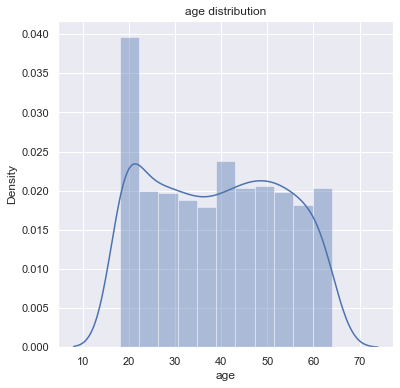

In [8]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

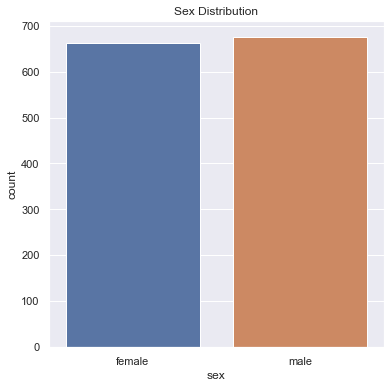

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\SHREYAS WAIKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


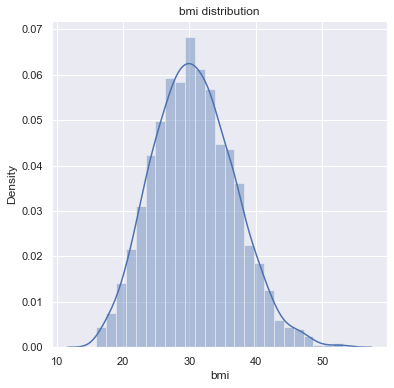

In [11]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('bmi distribution')
plt.show()

Text(0.5, 1.0, 'Children')

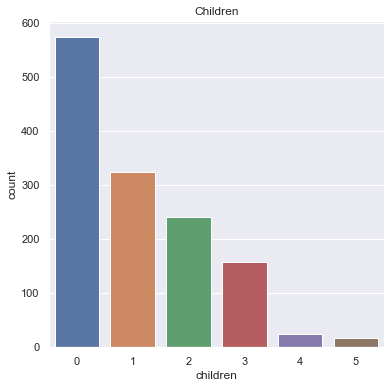

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('Children')

In [13]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker')

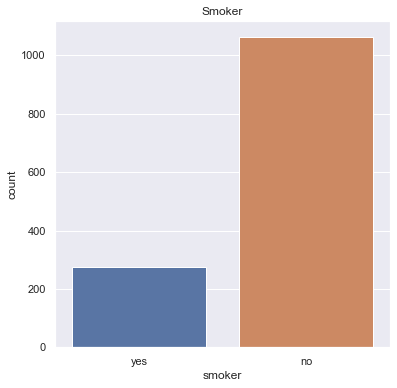

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Text(0.5, 1.0, 'region')

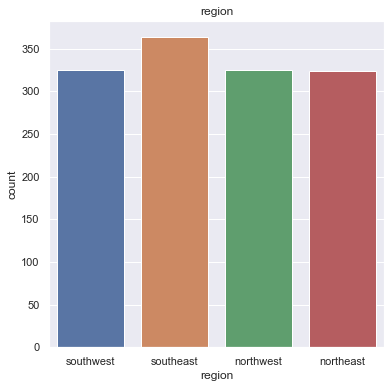

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('region')

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\SHREYAS WAIKAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


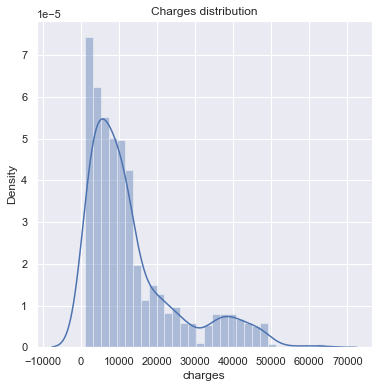

In [18]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges distribution')
plt.show()

In [19]:
df.replace({'sex':{'male':1,'female':0}},inplace=True)
    
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [20]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,2,6406.41070
9,60,0,25.840,0,0,3,28923.13692


In [21]:
X = df.drop(columns='charges',axis=1)
Y = df['charges']

In [22]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [23]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [26]:
lr= LinearRegression()

In [27]:
lr.fit(X_train, Y_train)

LinearRegression()

In [28]:
training_data_prediction = lr.predict(X_train)

In [29]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.751505643411174


In [30]:
test_data_prediction = lr.predict(X_test)

In [31]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print('R squared  value : ', r2_test)

R squared  value :  0.7447273869684077


In [32]:
input_data = ( 31,0,25.74,0,0,0)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

prediction[0]



C:\Users\SHREYAS WAIKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


3760.0805764960514

In [33]:
input_data = (60,0,36.005,0,0,2)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)

prediction[0]


C:\Users\SHREYAS WAIKAR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


14869.358972029244